In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.models import Sequential
from keras.preprocessing import image



In [2]:
train_datagen=image.ImageDataGenerator(rescale=1/255, horizontal_flip=True, zoom_range=0.2)
train_data= train_datagen.flow_from_directory(directory=r"D:\abcdefghj\Projects\Covid_Detection\Dataset\Train", target_size= (256,256), batch_size=16, class_mode='binary')

Found 288 images belonging to 2 classes.


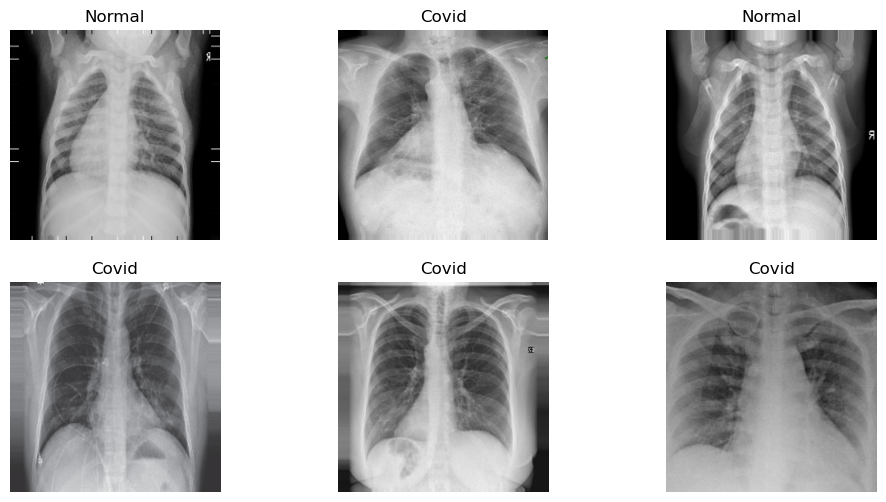

In [38]:
import matplotlib.pyplot as plt

# Assuming you have already created the train_data generator

# Get a batch of images and labels
images, labels = train_data.next()

# Display a few sample images and their corresponding labels
plt.figure(figsize=(12, 6))
for i in range(6):  # Display the first 6 images from the batch
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i])
    if labels[i] == 0:
        label_text = "Covid"
    else:
        label_text = "Normal"
    plt.title(label_text)
    plt.axis('off')

plt.show()


In [4]:
train_data.class_indices

{'Covid': 0, 'Normal': 1}

In [5]:
val_datagen=image.ImageDataGenerator(rescale=1/255)
val_data= val_datagen.flow_from_directory(directory=r"D:\abcdefghj\Projects\Covid_Detection\Dataset\Val", target_size= (256,256), batch_size=16, class_mode='binary')

Found 60 images belonging to 2 classes.


In [6]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(256,256,3)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.25))

model.add(Flatten())
 
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 126, 126, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                    

In [9]:
model.fit_generator(train_data, steps_per_epoch=8, epochs=10, validation_data= val_data)

C:\Users\dnyan\AppData\Local\Temp\ipykernel_11204\628806633.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_data, steps_per_epoch=8, epochs=10, validation_data= val_data)


Epoch 1/10
8/8 [==============================] - 31s 4s/step - loss: 1.4101 - accuracy: 0.4844 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 25s 3s/step - loss: 0.6907 - accuracy: 0.5859 - val_loss: 0.6880 - val_accuracy: 0.6333
Epoch 3/10
8/8 [==============================] - 26s 3s/step - loss: 0.6294 - accuracy: 0.7266 - val_loss: 0.4892 - val_accuracy: 0.9167
Epoch 4/10
8/8 [==============================] - 25s 3s/step - loss: 0.4295 - accuracy: 0.7969 - val_loss: 0.2269 - val_accuracy: 0.9500
Epoch 5/10
8/8 [==============================] - 25s 3s/step - loss: 0.2849 - accuracy: 0.8906 - val_loss: 0.1526 - val_accuracy: 0.9333
Epoch 6/10
8/8 [==============================] - 26s 3s/step - loss: 0.3119 - accuracy: 0.8672 - val_loss: 0.2269 - val_accuracy: 0.9500
Epoch 7/10
8/8 [==============================] - 26s 3s/step - loss: 0.2742 - accuracy: 0.8828 - val_loss: 0.1245 - val_accuracy: 0.9500
Epoch 8/10
8/8 [==================

In [10]:
validation_loss, validation_accuracy = model.evaluate(val_data)

# Print the accuracy
print("Validation Accuracy: {:.2f}%".format(validation_accuracy * 100))

4/4 [==============================] - 3s 703ms/step - loss: 0.1920 - accuracy: 0.9167
Validation Accuracy: 91.67%


4/4 [==============================] - 3s 748ms/step


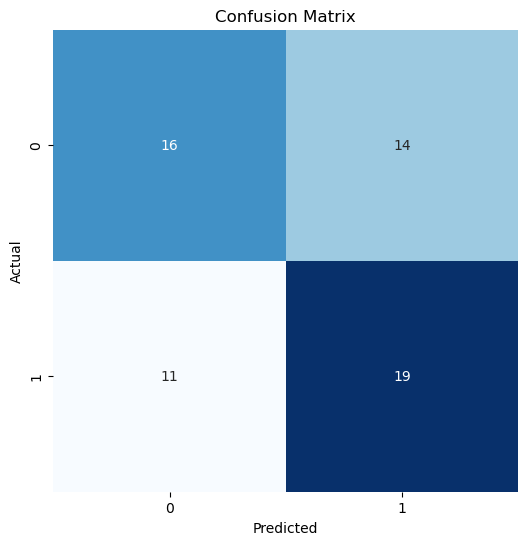

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import seaborn as sns

# Assuming you have already loaded and trained your model, and have the validation data generator

# Generate predictions for the validation data
predictions = model.predict(val_data)
# Convert the predicted probabilities to binary labels using a threshold (e.g., 0.5)
predicted_labels = (predictions > 0.5).astype(int)
# Get true labels from the data generator
true_labels = val_data.classes  # It retrieves the true labels (0 or 1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [12]:
TP = conf_matrix[1][1]  # True Positives
TN = conf_matrix[0][0]  # True Negatives
FP = conf_matrix[0][1]  # False Positives
FN = conf_matrix[1][0]
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity =  TP / (TP + FN)
print(accuracy)
print(sensitivity)
print(specificity)

0.5833333333333334
0.6333333333333333
0.5333333333333333


Accuracy: 0.94


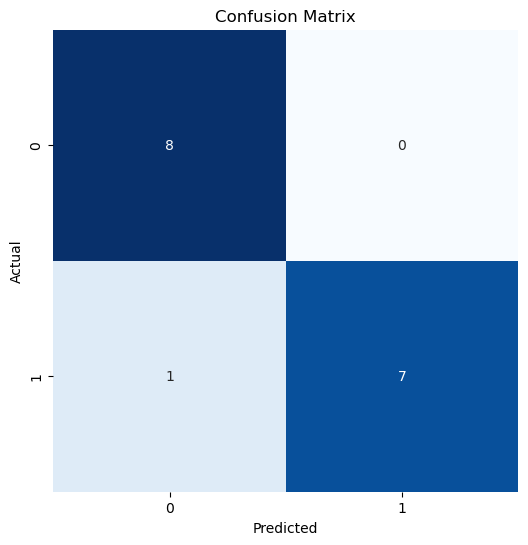

              precision    recall  f1-score   support

      Normal       0.89      1.00      0.94         8
    COVID-19       1.00      0.88      0.93         8

    accuracy                           0.94        16
   macro avg       0.94      0.94      0.94        16
weighted avg       0.94      0.94      0.94        16



In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded and prepared your COVID-19 detection data using train_data and val_data
# Assuming you have loaded data using an ImageDataGenerator

# Reshape the data



# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)

# Extract features and labels from the train_data generator
X_train, y_train = train_data.next()
X_train = X_train.reshape(X_train.shape[0], -1)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Extract features and labels from the val_data generator
X_val, y_val = val_data.next()
X_val = X_val.reshape(X_val.shape[0], -1)

# Make predictions on the validation data
y_pred = rf_classifier.predict(X_val)

# Calculate and print the accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Display a classification report
print(classification_report(y_val, y_pred, target_names=["Normal", "COVID-19"]))


In [40]:
import cv2
import numpy as np

def preprocess_image(image_path):
    try:
        # Load the image
        image = cv2.imread(image_path)

        if image is None:
            raise Exception(f"Failed to load image: {image_path}")

        # Resize the image to the desired size
        target_size = (256, 256)  # Replace with your target size
        image = cv2.resize(image, target_size)

        # Normalize the image if needed
        image = image / 255.0  # Normalize pixel values to the range [0, 1]

        return image
    except Exception as e:
        print(f"Error: {str(e)}")
        return None

# Usage
image_path = r"C:\Users\dnyan\Downloads\archive (3)\chest_xray\val\PNEUMONIA\person1951_bacteria_4882.jpeg"
preprocessed_image = preprocess_image(image_path)

if preprocessed_image is not None:
    # Make predictions and print results
    reshaped_image = preprocessed_image.reshape(1, -1)
    predicted_label = rf_classifier.predict(reshaped_image)[0]
    if predicted_label == 0:
        print("Predicted Label: Covid-19")
    else:
        print("Predicted Label: Normal")


Predicted Label: Covid-19


(1, 256, 256, 3)

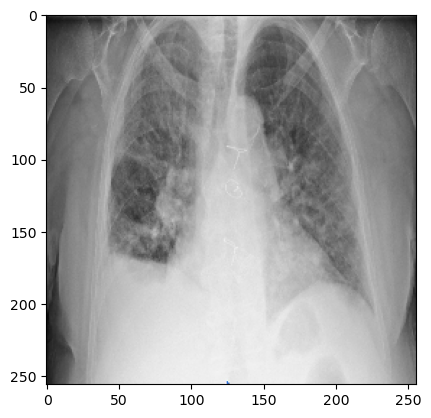

In [23]:
from keras.preprocessing import image
from tensorflow.keras.utils import load_img, img_to_array
path=r"D:\abcdefghj\Projects\Covid_Detection\Dataset\Val\Covid\6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg"
img=load_img(path, target_size=(256,256,3))
img= img_to_array(img)/255
plt.imshow(img)
img=np.array([img])
img.shape

In [36]:
X_train

array([[0.01960784, 0.01960784, 0.01960784, ..., 0.09803922, 0.09803922,
        0.09803922],
       [0.35258028, 0.35258028, 0.35258028, ..., 0.07058824, 0.07058824,
        0.07058824],
       [0.23424473, 0.23424473, 0.23424473, ..., 0.5473122 , 0.5473122 ,
        0.5473122 ],
       ...,
       [0.22041227, 0.22041227, 0.22041227, ..., 0.67013335, 0.67013335,
        0.67013335],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03244428, 0.03244428, 0.03244428, ..., 0.10554135, 0.10554135,
        0.10554135]], dtype=float32)

In [25]:
prediction= (model.predict(img)).astype("int32")
prediction

1/1 [==============================] - 0s 47ms/step


array([[0]])

In [26]:
pred=model.predict(img)

if(pred< 0.5):
    print("Covid")
else:
    print("Normal")

1/1 [==============================] - 0s 87ms/step
Covid


In [17]:
model.save("Covid.h5")


In [18]:
from tensorflow.keras.models import load_model

loaded_model = load_model('Covid.h5')


In [19]:
loaded_model.predict(img)

1/1 [==============================] - 0s 175ms/step


array([[0.0838078]], dtype=float32)